In [6]:
# Librerias
import quandl
import datetime
from datetime import datetime
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import time
import locale
#locale.setlocale(locale.LC_TIME,"es_MX")
#locale.setlocale(locale.LC_ALL,"es_MX")
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.carrerasenlinea.mx/logos/original/logo-instituto-tecnologico-y-de-estudios-superiores-de-occidente.png" width="150px" height="100px" />

# Proyecto de Aplicación Profesional

## Optimización De Programas de Inversión para Intermediarios Financieros



### Integrantes:

### - Jazmín Calderón
### - Diana Chávez
### - Juan Antonio Flores




In [7]:
#Lista de nombres de los 36 ETF's

lista = ['https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-1-3-Year-Treasury-Bond-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-20-Year-Treasury-Bond-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-7-10-Year-Treasury-Bond-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-MSCI-EAFE-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-MSCI-Emerging-Markets-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-MSCI-Total-International-Stock-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-SP-500-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-SP-Mid-Cap-ETF_fund.csv', 
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-SP-Total-US-Stock-Market-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Core-US-Aggregate-Bond-ETF_fund.csv', #beta cero
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Edge-MSCI-Min-Vol-EAFE-ETF_fund.csv', 
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Edge-MSCI-Min-Vol-USA-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Edge-MSCI-USA-Quality-Factor-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Evol-Media-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Expanded-Tech-Sector-ETF_fund.csv', #nuevo 
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Expanded-Tech-Software-Sector-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Floating-Rate-Bond-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-JP-Morgan-USD-Emerging-Markets-Bond-ETF_fund.csv', #el ultimo que hice
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-MSCI-ACWI-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-MSCI-EAFE-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-MSCI-Emerging-Markets-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-MSCI-Japan-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Nasdaq-Biotechnology-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Russell-1000-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Russell-1000-Growth-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Russell-1000-Value-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-Russell-2000-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-SP-500-Growth-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-SP-500-Value-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Basic-Materials-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Consumer-Services-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Energy-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Financial-Services-ETF_fund.csv',#nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Financials-ETF_fund.csv',#nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Healthcare-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Industrials-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Medical-Devices-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Pharmaceuticals-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Technology-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETFS/iShares-US-Telecommunications-ETF_fund.csv']

In [8]:
listas = ['https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-1-3-Year-Treasury-Bond-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-20-Year-Treasury-Bond-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-7-10-Year-Treasury-Bond-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-MSCI-EAFE-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-MSCI-Emerging-Markets-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-MSCI-Total-International-Stock-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-SP-500-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-SP-Mid-Cap-ETF_fund.csv', 
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-SP-Total-US-Stock-Market-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Core-US-Aggregate-Bond-ETF_fund.csv', #beta cero
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Edge-MSCI-Min-Vol-EAFE-ETF_fund.csv', 
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Edge-MSCI-Min-Vol-USA-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Edge-MSCI-USA-Quality-Factor-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Evol-Media-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Expanded-Tech-Sector-ETF_fund.csv', #nuevo 
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Expanded-Tech-Software-Sector-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Floating-Rate-Bond-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-JP-Morgan-USD-Emerging-Markets-Bond-ETF_fund.csv', #el ultimo que hice
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-MSCI-ACWI-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-MSCI-EAFE-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-MSCI-Emerging-Markets-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-MSCI-Japan-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Nasdaq-Biotechnology-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Russell-1000-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Russell-1000-Growth-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Russell-1000-Value-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-Russell-2000-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-SP-500-Growth-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-SP-500-Value-ETF_fund.csv',
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Basic-Materials-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Consumer-Services-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Energy-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Financial-Services-ETF_fund.csv',#nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Financials-ETF_fund.csv',#nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Healthcare-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Industrials-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Medical-Devices-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Pharmaceuticals-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Technology-ETF_fund.csv', #nuevo
         'https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-US-Telecommunications-ETF_fund.csv']

## Importar Datos

## ETF'S

In [9]:
def ETF_date(j):
    fecha=[]

    ETF = pd.read_csv(lista[j], skiprows = [0,1,2,3] )
    for i in range(len(ETF["Month End Date"])): #for para numero de fechas dentro de un archivo
        fecha.append(ETF["Month End Date"].iloc[i].replace("-"," "))
        ETF['Monthly Total (NAV) Return'] = ETF['Monthly Total (NAV) Return'].replace('--',"0")
        ETF['Monthly Total (NAV) Return'] = ETF['Monthly Total (NAV) Return'].astype(float)

    tabla=pd.DataFrame(columns=['Month End Date','Monthly Total (NAV) Return'])
    #tabla.index.name = "ETF"
    tabla['Month End Date'] = fecha
    x=ETF['Monthly Total (NAV) Return']
    tabla['Monthly Total (NAV) Return']=x
    tabla['Month End Date'] = pd.to_datetime(tabla['Month End Date'], format='%b %d, %Y')
    grupo = tabla.groupby(tabla['Month End Date'].dt.year)['Monthly Total (NAV) Return'].agg(["mean","std"]).unstack()

    return(grupo)

In [10]:
m0 = ETF_date(0)['mean']
m1 = ETF_date(1)['mean']
m2 = ETF_date(2)['mean']
m3 = ETF_date(3)['mean']
m4 = ETF_date(4)['mean']
m5 = ETF_date(5)['mean']
m6 = ETF_date(6)['mean']
m7 = ETF_date(7)['mean']
m8 = ETF_date(8)['mean']
m9 = ETF_date(9)['mean']
m10 = ETF_date(10)['mean']
m11 = ETF_date(11)['mean']
m12 = ETF_date(12)['mean']
m13 = ETF_date(13)['mean']
m14 = ETF_date(14)['mean']
m15 = ETF_date(15)['mean']
m16 = ETF_date(16)['mean']
m17 = ETF_date(17)['mean']
m18 = ETF_date(18)['mean']
m19 = ETF_date(19)['mean']
m20 = ETF_date(20)['mean']
m21 = ETF_date(21)['mean']
m22 = ETF_date(22)['mean']
m23 = ETF_date(23)['mean']
m24 = ETF_date(24)['mean']
m25 = ETF_date(25)['mean']
m26 = ETF_date(26)['mean']
m27 = ETF_date(27)['mean']
m28 = ETF_date(28)['mean']
m29 = ETF_date(29)['mean']
m30 = ETF_date(30)['mean']
m31 = ETF_date(31)['mean']
m32 = ETF_date(32)['mean']
m33 = ETF_date(33)['mean']
m34 = ETF_date(34)['mean']
m35 = ETF_date(35)['mean']
m36 = ETF_date(36)['mean']
m37 = ETF_date(37)['mean']
m38 = ETF_date(38)['mean']
m39 = ETF_date(39)['mean']


a = pd.DataFrame({'0': m0,'1': m1, '2': m2,'3': m3, '4': m4,'5': m5, '6': m6,'7': m7, '8': m8,'9': m9,
                  '10': m10,'11': m11, '12': m12,'13': m13, '14': m14,'15': m15, '16': m16,
                  '17': m17, '18': m18,'19': m19, '20': m20,'21': m21, '22': m22,'23': m23, '24': m24,
                  '25': m25, '26': m26,'27': m27, '28': m28, '29': m29, '30': m30,'31': m31, '32': m32,
                  '33': m33, '34': m34,'35': m35, '36': m36, '37': m37, '38': m38,'39':m39 })

pd.set_option('display.max_columns', 40)
b = a.fillna("")
b

,0,1,10,11,12,13,14,15,16,17,18,19,2,20,21,22,23,24,25,26,27,28,29,3,30,31,32,33,34,35,36,37,38,39,4,5,6,7,8,9
Month End Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996,,,,,,,,,,,,,,,-1.640000,,,,,,,,,,,,,,,,,,,,,,,,,
1997,,,,,,,,,,,,,,,-2.009167,,,,,,,,,,,,,,,,,,,,,,,,,
1998,,,,,,,,,,,,,,,0.530833,,,,,,,,,,,,,,,,,,,,,,,,,
1999,,,,,,,,,,,,,,,4.013333,,,,,,,,,,,,,,,,,,,,,,,,,
2000,,,,,,,,,,,,,,,-2.588333,,-0.6925,-2.47625,0.8575,0.46,-2.25375,0.8175,2.48571,,-1.08143,1.94714,3.53,,,-0.244286,,,-4.14625,-4.325,,,-1.01625,1.26,,
2001,,,,,,,0.596,0.52,,,,-0.622,,,-2.831667,0.237273,-0.9575,-1.53083,-0.425,0.385,-0.939167,-0.921667,0.266667,,0.306667,-0.8725,-0.435,0.001,-0.376,-0.646667,,,-1.515,-1.38667,,,-0.904167,0.1525,,
2002,0.331667,1.56667,,,,,-3.48333,-3.95583,,,,-1.26,1.09333,,-0.770000,-4.55833,-1.86167,-2.525,-1.25333,-1.6875,-2.07667,-1.75083,-0.536667,,-2.1525,-1.24333,-0.916667,-0.998333,-1.88917,-2.2125,,,-3.26167,-3.18417,,,-1.90083,-1.18167,,
2003,0.1475,0.236667,,,,,3.74417,3.53667,,,,2.8275,0.200833,5.01556,2.673333,3.3875,2.23667,2.21083,2.25417,3.355,1.9325,2.3875,2.6525,,2.4975,2.14833,2.54667,2.37583,1.4725,2.45167,,,3.52917,1.14417,,,2.16167,2.62083,,0.0725
2004,0.0666667,0.7475,,,,,0.314167,1.18333,,,,1.5475,0.379167,2.01,1.285833,0.450833,0.915833,0.526667,1.285,1.4825,0.504167,1.2275,1.05417,,0.86,2.38083,0.981667,1.04083,0.364167,1.30667,,,0.219167,1.42,,,0.8775,1.3075,0.780833,0.331667


In [11]:
#Rendimiento promedio de los ETFS por año
ren_a = []
for i in range(1996,2020):
    nn = a.loc[i].mean()
    ren_a.append(nn)

In [12]:
#Desv de los ETFS por año
des_a = []
for i in range(1996,2020):
    ll = a.loc[i].std()
    des_a.append(ll)

In [13]:
#Cuando hay nan para saber cuantos fondos por año
po = []
c = a.isnull().sum(axis=1)
num = (len(lista)-c)
po.append(num)

In [14]:
a_etf = []
for i in range(1995,2019):
    a_etf.append(1+i)

In [101]:
num = [1,1,1,1,16,22,25,27,28,29,30,31,32,32,32,35,38,39,39,39,39,39,40,40]
n_etf = pd.DataFrame(columns=['Números de ETFs', 'Rendimiento promedio anual', 'Desviación estándar'])
n_etf['Año'] = a_etf
n_etf.set_index('Año',inplace=True)
n_etf['Números de ETFs'] = num
n_etf['Rendimiento promedio anual'] = ren_a
n_etf['Desviación estándar'] = des_a
#n_etf = n_etf.fillna(0)
n_etf

,Números de ETFs,Rendimiento promedio anual,Desviación estándar
Año,,,
1996,1,-1.640000,NaN
1997,1,-2.009167,NaN
1998,1,0.530833,NaN
1999,1,4.013333,NaN
2000,16,-0.466637,2.290546
2001,22,-0.540851,0.836840
2002,25,-1.666733,1.432421
2003,27,2.289619,1.177428
2004,28,0.958988,0.549175


In [117]:
n_etf1 = n_etf.drop(columns = ['Números de ETFs'])
n_etf1 = n_etf1.fillna(0)
#n_etf1

In [114]:
vegetables =a_etf
farmers = ["Números de ETFs","Rendimiento", "Riesgo"]

harvest = np.array([n_etf1.iloc[0],n_etf1.iloc[1],n_etf1.iloc[2],n_etf1.iloc[3],n_etf1.iloc[4],
                   n_etf1.iloc[5],n_etf1.iloc[6],n_etf1.iloc[7],n_etf1.iloc[8],n_etf1.iloc[9],
                   n_etf1.iloc[10],n_etf1.iloc[11],n_etf1.iloc[12],n_etf1.iloc[13],n_etf1.iloc[14],
                   n_etf1.iloc[15],n_etf1.iloc[16],n_etf1.iloc[17],n_etf1.iloc[18],n_etf1.iloc[19],
                   n_etf1.iloc[20],n_etf1.iloc[21],n_etf1.iloc[22],n_etf1.iloc[23]])

In [115]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

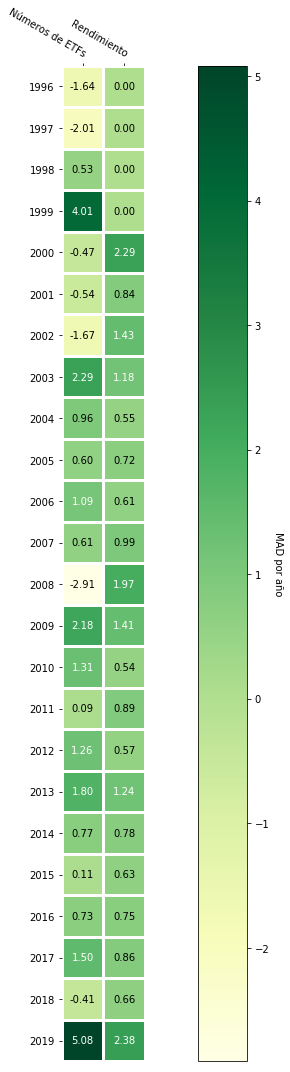

In [116]:
fig, ax = plt.subplots(figsize=(15,15))

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax,
                   cmap="YlGn", cbarlabel="MAD por año")
texts = annotate_heatmap(im)

fig.tight_layout()
plt.show()

## LO DE LAS SHARES QUE NO SALE HAHAHAHA

In [ ]:
def ETF_share(j):
    fecha=[]
    
    ETF = pd.read_csv(listas[j], thousands=',')
    ETF = ETF.drop(columns = ['Index Level', 'NAV per Share', 'Ex-Dividends'])
    ETF['Shares Outstanding'] = ETF['Shares Outstanding'].astype(float)
    for i in range(len(ETF["As Of"])): #for para numero de fechas dentro de un archivo
        fecha.append(ETF["As Of"].iloc[i].replace("-"," "))

    tabla=pd.DataFrame(columns=['Shares Outstanding'])
    #tabla.index.name = "ETF"
    tabla['As Of'] = fecha
    x=ETF['Shares Outstanding']
    tabla['Shares Outstanding']=x
    tabla['As Of'] = pd.to_datetime(tabla['As Of'], format='%b %d, %Y')
    share = tabla.groupby(tabla['As Of'].dt.year)['Shares Outstanding'].agg(['mean'])
    return(share)

In [ ]:

ETF = pd.read_csv(listas[1], thousands=',', sep=',')
a = ETF.replace(",","")
a

In [ ]:
ETF_share(1)

ETF_share(1)

In [ ]:
ETF = pd.read_csv(listas[2], index_col = ["As Of"], thousands=',')
ETF = ETF.drop(columns = ['Index Level', 'NAV per Share', 'Ex-Dividends'])
ETF

def ETF_share(j):
    fecha=[]
    
    ETF = pd.read_csv('https://raw.githubusercontent.com/Dianachav/PAP_Spring_19/master/ETF_S/S_iShares-1-3-Year-Treasury-Bond-ETF_fund.csv', thousands=',')
    ETF = ETF.drop(columns = ['Index Level', 'NAV per Share', 'Ex-Dividends'])
    for i in range(len(ETF["As Of"])): #for para numero de fechas dentro de un archivo
        fecha.append(ETF["As Of"].iloc[i].replace("-"," "))
        ETF['Shares Outstanding'] = ETF['Shares Outstanding'].astype(float)

    tabla=pd.DataFrame(columns=['Shares Outstanding'])
    tabla['As Of'] = fecha
    x=ETF['Shares Outstanding']
    tabla['Shares Outstanding']=x
    tabla['As Of'] = pd.to_datetime(tabla['As Of'], format='%b %d, %Y')
    share = tabla.groupby(tabla['As Of'].dt.year)['Shares Outstanding'].agg(['mean'])
    return(share)

In [ ]:
fecha=[]

ETF = pd.read_csv(listas[1], thousands=',')
ETF = ETF.drop(columns = ['Index Level', 'NAV per Share', 'Ex-Dividends'])
ETF['Shares Outstanding'] = ETF['Shares Outstanding'].astype(float)
for i in range(len(ETF["As Of"])): #for para numero de fechas dentro de un archivo
    fecha.append(ETF["As Of"].iloc[i].replace("-"," "))

tabla=pd.DataFrame(columns=['Shares Outstanding'])
#tabla.index.name = "ETF"
tabla['As Of'] = fecha
x=ETF['Shares Outstanding']
tabla['Shares Outstanding']=x
tabla['As Of'] = pd.to_datetime(tabla['As Of'], format='%b %d, %Y')
share = tabla.groupby(tabla['As Of'].dt.year)['Shares Outstanding'].agg(['mean'])
tabla

In [ ]:
ETF_date(1)

In [ ]:
## usuario y apy key en caso de necesitarse
##plotly.tools.set_credentials_file(username='jazerape', api_key='eX7PWHChSnlXoCQOaddE')

### Medidas de Atribución al desempeño

In [ ]:
usd_rate = [0.0241,0.0241,0.0239,0.0240,0.0241,0.0241,0.0243,0.0243,0.0242,0.0242,0.0241,
           0.0241,0.0241,0.0239,0.0240,0.0241,0.0241,0.0243,0.0243,0.0242,0.0242,0.0241,
           0.0241,0.0241,0.0239,0.0240]#,0.0241,0.0241,0.0243,0.0243,0.0242,0.0242,0.0241,
           #0.0241,0.0241,0.0239] #tasa libre de riesgo EEUU #0.0241
sharpe_ETF=[]
for i in range(26):
    #sharpe[i] = (rend[i]-usd_rate[i])/desv[i]
    sharpe_ETF.append(round(((rend[i]-usd_rate[i])/desv[i]),2))
#print(sharpe_ETF)

In [ ]:
# Treynor
beta = [-0.02,-0.09,-0.09,0.77,0.80,0.79,1.00,1.18,1.03,0.01,0.54,0.75,0.98,0.03,0.17,0.90,0.75,0.81,0.73,1.48,1.01,1.07,
        0.95,1.26,1.02,0.98]

#0.01 en realidad es cero

treynor_ETF=[]
for i in range(26):
    #sharpe[i] = (rend[i]-usd_rate[i])/desv[i]
    treynor_ETF.append(round(((rend[i]-usd_rate[i])/beta[i]),2))
#print(treynor_ETF)




In [ ]:
tabla = pd.DataFrame(index=lista,columns=['Rend %','Riesgo','Sharpe','Treynor %'])
tabla.index.name = "ETF"
tabla['Rend %'] = rend
tabla['Riesgo'] = desv
tabla['Sharpe'] = sharpe_ETF
tabla['Treynor %'] = treynor_ETF
tabla

In [ ]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df2 = tabla[['Rend %']]
heatmap2_data = pd.pivot_table(df2,values=None, index=['ETF'], columns=None)
heatmap2_data.head(n=25)
sns.heatmap(heatmap2_data, cmap="BuGn")

In [ ]:
df3 = tabla[['Rend %','Riesgo']]
heatmap3_data = pd.pivot_table(df3,values=None, index=['Riesgo'], columns=None)
heatmap3_data.head(n=5)
sns.heatmap(heatmap3_data, cmap="magma")

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
vegetables = lista
farmers = ["Rend", "Riesgo", "Sharpe","Treynor"]

harvest = np.array([tabla.iloc[0],tabla.iloc[1],tabla.iloc[2],tabla.iloc[3],tabla.iloc[4],
                   tabla.iloc[5],tabla.iloc[6],tabla.iloc[7],tabla.iloc[8],tabla.iloc[9],
                   tabla.iloc[10],tabla.iloc[11],tabla.iloc[12],tabla.iloc[13],tabla.iloc[14],
                   tabla.iloc[15],tabla.iloc[16],tabla.iloc[17],tabla.iloc[18],tabla.iloc[19],
                   tabla.iloc[20],tabla.iloc[21],tabla.iloc[22],tabla.iloc[22],tabla.iloc[24],tabla.iloc[25]])


In [ ]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Arguments:
        im         : The AxesImage to be labeled.
    Optional arguments:
        data       : Data used to annotate. If None, the image's data is used.
        valfmt     : The format of the annotations inside the heatmap.
                     This should either use the string format method, e.g.
                     "$ {x:.2f}", or be a :class:`matplotlib.ticker.Formatter`.
        textcolors : A list or array of two color specifications. The first is
                     used for values below a threshold, the second for those
                     above.
        threshold  : Value in data units according to which the colors from
                     textcolors are applied. If None (the default) uses the
                     middle of the colormap as separation.

    Further arguments are passed on to the created text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[im.norm(data[i, j]) > threshold])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax,
                   cmap="YlGn", cbarlabel="MAD según ETF")
texts = annotate_heatmap(im)

fig.tight_layout()
plt.show()
